/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5421 - loss: 1.0026 - val_accuracy: 0.6333 - val_loss: 0.9228
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6211 - loss: 0.9123 - val_accuracy: 0.6267 - val_loss: 0.8936
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6244 - loss: 0.8796 - val_accuracy: 0.6267 - val_loss: 0.8869
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6319 - loss: 0.8639 - val_accuracy: 0.6267 - val_loss: 0.8838
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6458 - loss: 0.8539 - val_accuracy: 0.6267 - val_loss: 0.8815
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6265 - loss: 0.8659 - val_accuracy: 0.6267 - val_loss: 0.8796
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6377 - loss: 0.8369 - val_accuracy: 0.6267 - val_loss: 0.8785
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6434 - loss: 0.8315 - val_accuracy: 0.6267 - val_loss

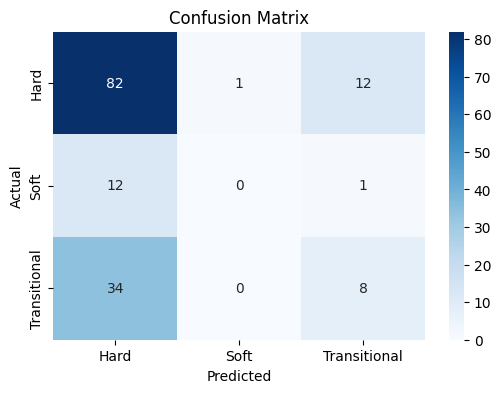

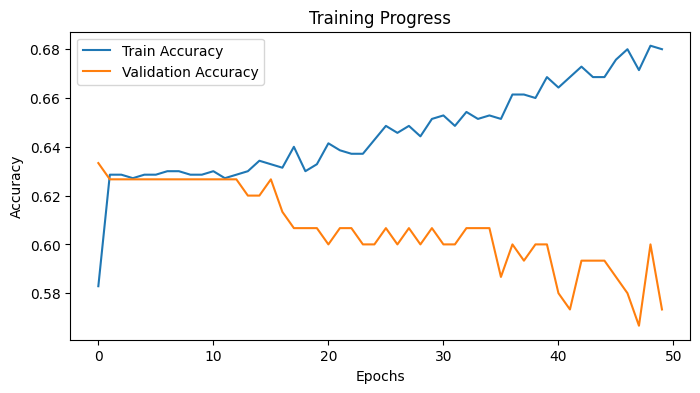

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
np.random.seed(42)
n_samples = 1000

data = {
    "Magnitude": np.random.uniform(3, 8, n_samples),
    "Depth": np.random.uniform(1, 100, n_samples),
    "Max_Acceleration": np.random.uniform(0.01, 1, n_samples),
    "Spectral_Mean": np.random.uniform(0.1, 10, n_samples),
    "Spectral_Max": np.random.uniform(0.1, 15, n_samples),
    "Spectral_Min": np.random.uniform(0.05, 5, n_samples),
    "Spectral_Std": np.random.uniform(0.01, 2, n_samples),
    "Soil_Type": np.random.choice(["Hard", "Transitional", "Soft"], n_samples, p=[0.6, 0.3, 0.1])
}
df = pd.DataFrame(data)

# Encode labels
label_encoder = LabelEncoder()
df["Soil_Type"] = label_encoder.fit_transform(df["Soil_Type"])

# Split data
X = df.drop("Soil_Type", axis=1)
y = df["Soil_Type"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build Neural Network Model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16)

# Evaluate on test data
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Progress")
plt.show()
